In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import zscore, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score, precision_recall_fscore_support
import seaborn as sns

# NN
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader
# from torchvision import datasets, transforms

In [2]:
df = pd.read_csv('./almonds/Almond.csv')
print(df.shape)
df.describe()

(2803, 14)


,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [4]:
# Remove the Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [5]:
df.isnull().sum()



Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

<Axes: >

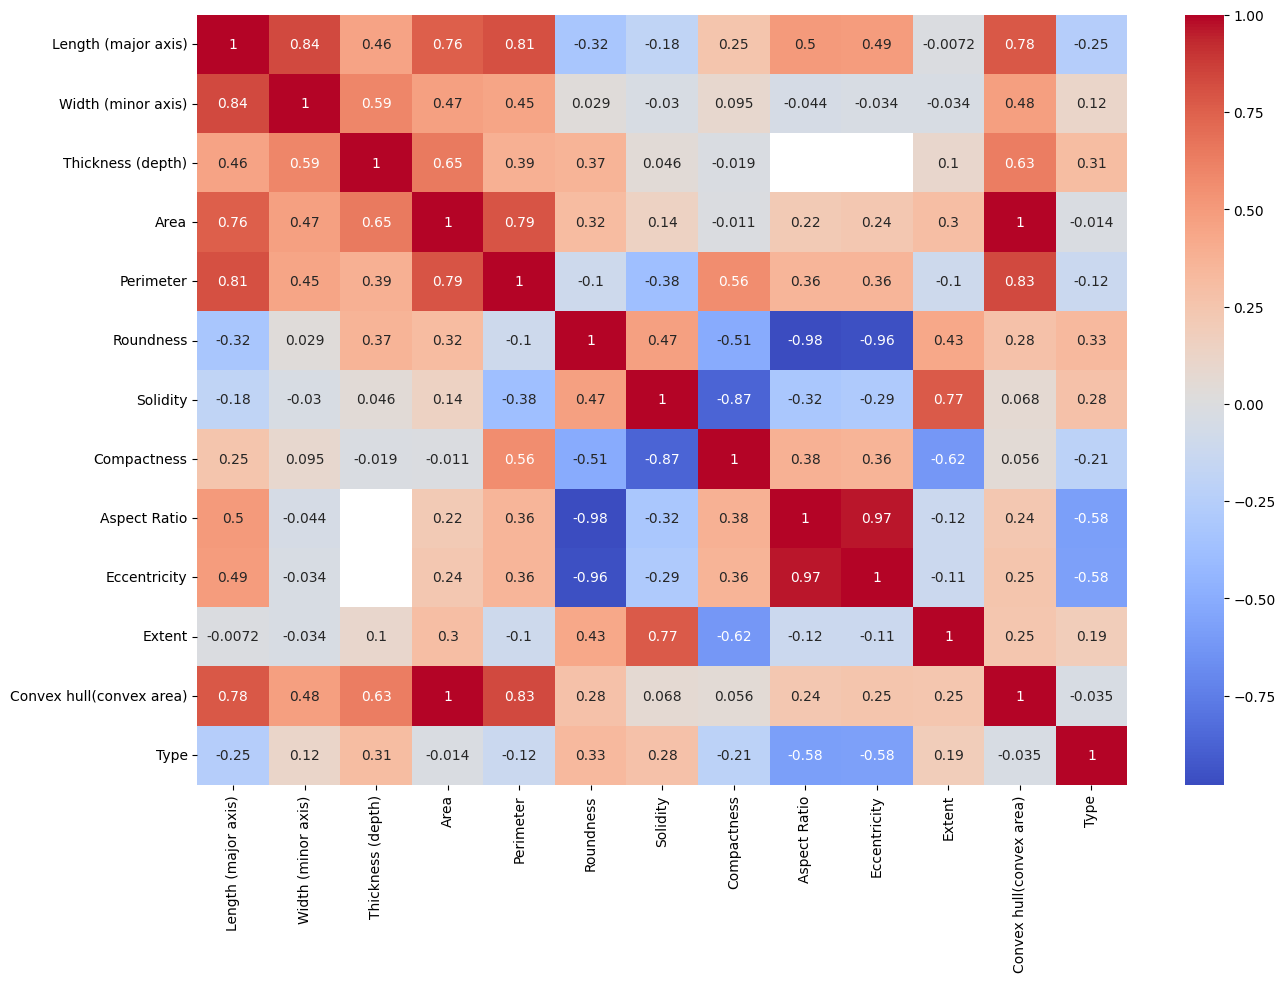

In [6]:
# Label encoding

corr_df = df.copy()
encoder = LabelEncoder()
corr_df['Type'] = encoder.fit_transform(corr_df['Type'])
# Draw correlation heatmap to see the correlation between features

corr_mat = corr_df.corr()
plt.gcf().set_size_inches(15, 10)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm') #make figure bigger
# plt.show()

In [7]:
# Fill nan values with mean of column where it is one of the almond types

df['Length (major axis)'] = df['Length (major axis)'].fillna(df['Length (major axis)'].median())
df['Width (minor axis)'] = df['Width (minor axis)'].fillna(df['Width (minor axis)'].median())
df['Thickness (depth)'] = df['Thickness (depth)'].fillna(df['Thickness (depth)'].median())

# df['Roundness'] = df['Roundness'].fillna(df['Roundness'].median())
# df['Aspect Ratio'] = df['Aspect Ratio'].fillna(df['Aspect Ratio'].mean())
# df['Eccentricity'] = df['Eccentricity'].fillna(df['Eccentricity'].mean())

df['Aspect Ratio'] = df['Length (major axis)'] / df['Width (minor axis)']
df['Eccentricity'] = np.sqrt(1 - (df['Width (minor axis)'] / df['Length (major axis)']) ** 2)
df['Roundness'] = 4 * df['Area'] / (np.pi * df['Length (major axis)'] ** 2)
# df['Extent'] = df['Area'] / (df['Length (major axis)']*df['Width (minor axis)'])
# df['Solidity'] = df['Area'] / df['Convex hull(convex area)']
# df['Compactness'] = df['Perimeter'] ** 2 / (4 * np.pi * df['Area'])

# df = df.drop('Eccentricity', axis=1)
# df = df.drop('Aspect Ratio', axis=1)
# df = df.drop('Compactness', axis=1)
# df = df.drop('Thickness (depth)', axis=1)

df.dropna(inplace=True)

df.isnull().sum()

/home/klairgo/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

array([[<Axes: title={'center': 'Length (major axis)'}>,
        <Axes: title={'center': 'Width (minor axis)'}>,
        <Axes: title={'center': 'Thickness (depth)'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Roundness'}>],
       [<Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'Aspect Ratio'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Convex hull(convex area)'}>]],
      dtype=object)

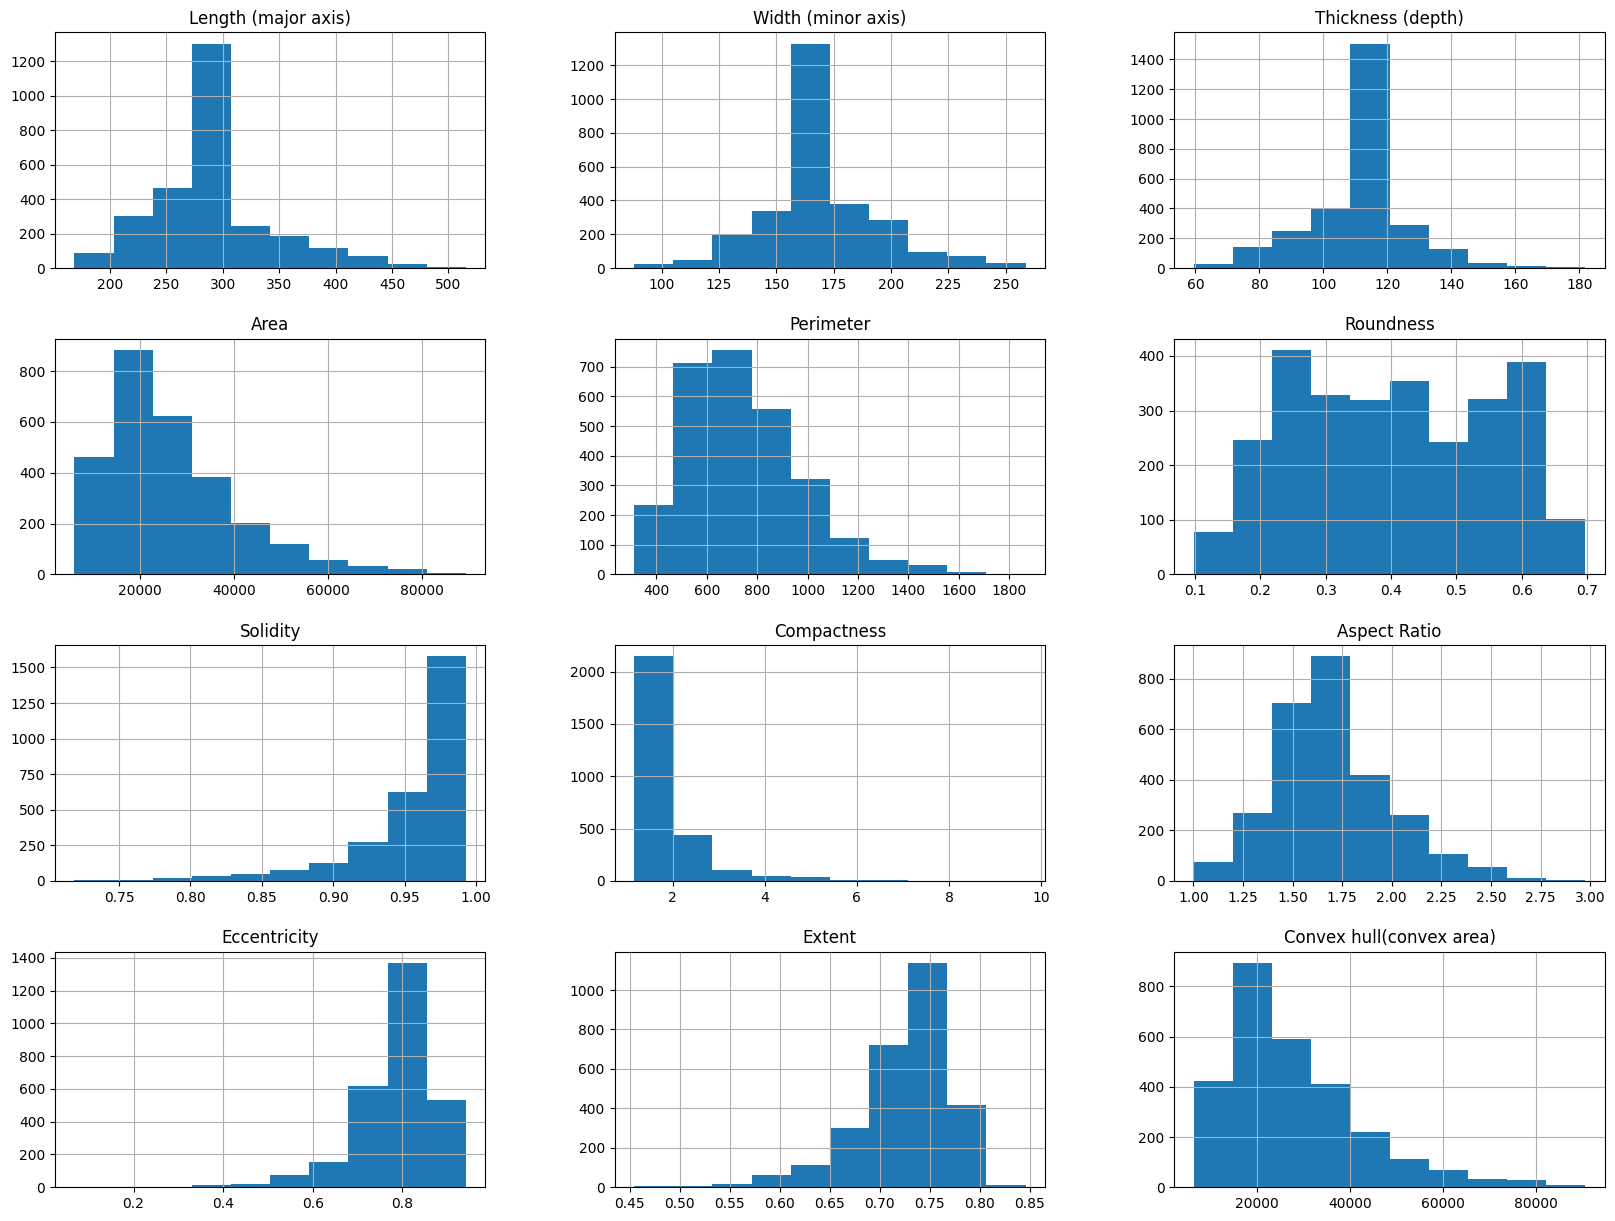

In [8]:
# Draw histograms for each column
df.hist(figsize=(20,15))

In [9]:
# # Remove outliers using z score

# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# for column in numerical_columns:
#     df = df[np.abs(zscore(df[column])) < 3]

# z_data = pd.DataFrame()

# # df = df.drop('Area', axis=1)
# # df = df.drop('Convex hull(convex area)', axis=1)
# # df = df.drop('Solidity', axis=1)

# z_data['Length (major axis)'] = zscore(df['Length (major axis)'])
# z_data['Width (minor axis)'] = zscore(df['Width (minor axis)'])
# z_data['Thickness (depth)'] = zscore(df['Thickness (depth)'])
# z_data['Area'] = zscore(df['Area'])
# z_data['Perimeter'] = zscore(df['Perimeter'])
# z_data['Roundness'] = zscore(df['Roundness'])
# z_data['Solidity'] = zscore(df['Solidity'])
# # z_data['Compactness'] = zscore(df['Compactness'])
# # z_data['Aspect Ratio'] = zscore(df['Aspect Ratio'])
# # z_data['Eccentricity'] = zscore(df['Eccentricity'])
# z_data['Extent'] = zscore(df['Extent'])
# z_data['Convex hull(convex area)'] = zscore(df['Convex hull(convex area)'])


# #Remove outliers
# df_wo = df[((z_data < 3) & (z_data > -3)).all(axis=1)]
# # df_wo = df


# # Count number of outliers
# print('Number of outliers: ')
# z_data[(z_data > 3) | (z_data < -3)].count()


array([[<Axes: title={'center': 'Length (major axis)'}>,
        <Axes: title={'center': 'Width (minor axis)'}>,
        <Axes: title={'center': 'Thickness (depth)'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Roundness'}>],
       [<Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'Aspect Ratio'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Convex hull(convex area)'}>]],
      dtype=object)

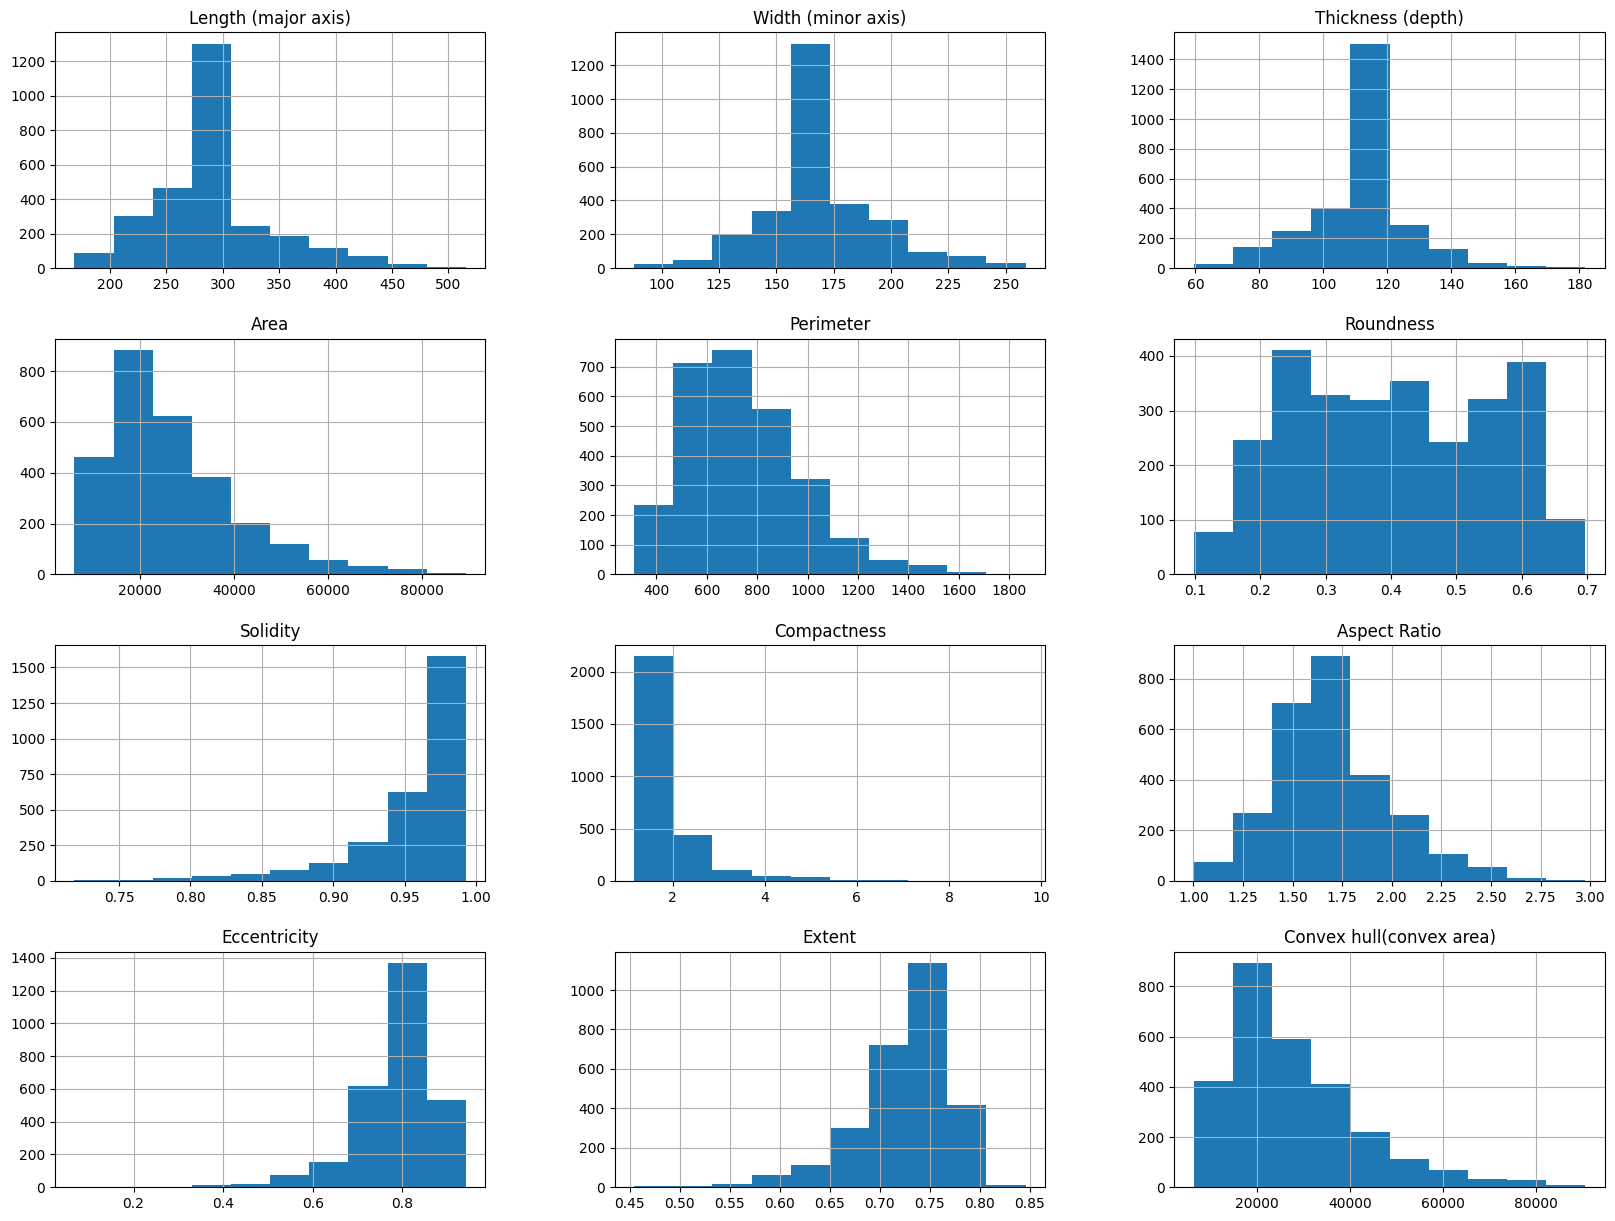

In [10]:
df.hist(figsize=(20,15))

In [31]:

scaled_X = None
# Initialize nn
class almondClassifier(nn.Module):
    def __init__(self, stack):
        super().__init__()
        self.flatten = nn.Flatten()
        self.lin_stack = stack

    def forward(self, x):
        x = self.flatten(x)
        logits = self.lin_stack(x)
        return logits

class NeuralNetwork():
    def __init__(self, loss_fn, epochs, stack, learning_rate, data_df):
        self.loss_fn = loss_fn
        self.epochs = epochs
        self. device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.learning_rate = learning_rate

        #Initialize the model
        self.model = almondClassifier(stack)

        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        # self.optimizer = optim.Adam(model.parameters(), lr=0.0002)
        # self.optimizer = optim.Rprop(model.parameters(), lr=0.0001)

        self.preprocess(data_df)

    def preprocess(self, df):

        scalar = RobustScaler()

        X = df.drop('Type', axis=1).values
        X = scalar.fit_transform(X)
        # scaled_X = X
        # X = scalar.fit_transform(X)

        # Encode Y using one hot ecnoding
        Y = df['Type'] 
        encoder = OneHotEncoder()
        Y = encoder.fit_transform(Y.values.reshape(-1,1)).toarray()
        # encoder = LabelEncoder()
        # Y = encoder.fit_transform(Y)

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

        # # Z-score ("standard score") notmalization
        # X_mean = X_train.mean()
        # X_std = X_train.std()
        # X_train = (X_train - X_mean) / X_std
        # X_test = (X_test - X_mean) / X_std

        X_train = torch.tensor(X_train).float().to(self.device)
        self.X_test = torch.tensor(X_test).float().to(self.device)
        Y_train = torch.tensor(Y_train).float().to(self.device)
        self.Y_test = torch.tensor(Y_test).float().to(self.device)

        # Create sets for k_fold

        self.X_k_train = torch.cat((X_train, self.X_test), 0)
        self.Y_k_train = torch.cat((Y_train, self.Y_test), 0)

        self.X_train, self.X_val, self.Y_train, self.Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=50, shuffle=True)


    def reset_weights(self, m):
        for layer in m.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

    def run_kfold(self, verbose=True, k_folds=5):

        kfold = KFold(n_splits=5, shuffle=True)

        k_accuracy_train = []
        k_accuracy_val = []
        k_loss_train = []
        k_loss_val = []

        for fold, (train_index, val_index) in enumerate(kfold.split(self.X_k_train)):
            epoch_accuracy_train = []
            epoch_accuracy_val = []
            epoch_loss = []
            epoch_val_loss = []

            self.model.apply(self.reset_weights)
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

            X_train_fold = self.X_k_train[train_index]
            Y_train_fold = self.Y_k_train[train_index]
            X_val_fold = self.X_k_train[val_index]
            Y_val_fold = self.Y_k_train[val_index]

            trainloader = DataLoader(TensorDataset(X_train_fold, Y_train_fold), batch_size=32, shuffle=True)

            for t in range(self.epochs):
                batch_accuracy = []
                batch_loss = []
                for X_batch, Y_batch in trainloader:

                    # Forward pass
                    Y_pred = self.model(X_batch)
                    loss = self.loss_fn(Y_pred, Y_batch)

                    batch_loss.append(loss.item())

                    _, predicted_pred = torch.max(Y_pred, dim=1)

                    train_accuracy = (predicted_pred == Y_batch).float().mean().item()

                    batch_accuracy.append(train_accuracy)

                    # Backward pass
                    self.optimizer.zero_grad()
                    loss.backward()
                    self.optimizer.step()

                epoch_loss.append(np.mean(batch_loss))
                epoch_accuracy_train.append(100 * np.mean(batch_accuracy))
                    
                with torch.no_grad():
                    Y_pred = self.model(X_val_fold)
                    val_loss = self.loss_fn(Y_pred, Y_val_fold)

                    _, predicted_pred = torch.max(Y_pred, dim=1)

                    test_accuracy = (Y_val_fold == predicted_pred).float().mean().item()

                    epoch_accuracy_val.append(100* test_accuracy)
                    epoch_val_loss.append(val_loss.item())

                if t % 50 == 0 and verbose:
                    print(f'Epoch {t} | Loss: {loss.item()} | Accuracy: {train_accuracy} | Validation Accuracy: {test_accuracy}')

            k_accuracy_train.append(np.mean(epoch_accuracy_train))
            k_accuracy_val.append(np.mean(epoch_accuracy_val))
            k_loss_train.append(np.mean(epoch_loss))
            k_loss_val.append(np.mean(epoch_val_loss))
        
        with torch.no_grad():
                fig,pos = plt.subplots(2,1,figsize=(7,7))
                pos[0].plot(range(k_folds),k_loss_train, label="Train Loss")
                pos[0].plot(range(k_folds),k_loss_val, label="Validation Loss")
                pos[0].set_xlabel("Epochs")
                pos[0].set_ylabel("Losses")
                pos[0].set_title("Losses")
                pos[0].legend()
                pos[1].plot(range(k_folds),k_accuracy_train,label="Train Accuracy")
                pos[1].plot(range(k_folds),k_accuracy_val,label="Test Accuracy")
                pos[1].set_xlabel("Epochs")
                pos[1].set_ylabel("Accuracies")
                pos[1].set_title("Train and test accuracies")
                pos[1].legend()
                plt.tight_layout()

        return np.mean(k_accuracy_val), np.mean(k_loss_val)



    def run_batch(self, batch_size = 32, verbose=True):
        
        self.trainloader = DataLoader(TensorDataset(self.X_train, self.Y_train), batch_size=batch_size, shuffle=True)

        epoch_accuracy_train = []
        epoch_accuracy_val = []
        epoch_loss = []
        epoch_val_loss = []

        for t in range(self.epochs):
            self.model.train()
            batch_accuracy = []
            batch_loss = []
            for X_batch, Y_batch in self.trainloader:

                # Forward pass
                Y_pred = self.model(X_batch)
                loss = self.loss_fn(Y_pred, Y_batch)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_batch = torch.max(Y_batch, dim=1)

                batch_loss.append(loss.item())

                train_accuracy = (predicted_pred == predicted_batch).float().mean().item()

                batch_accuracy.append(train_accuracy)

                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            epoch_loss.append(np.mean(batch_loss))
            epoch_accuracy_train.append(100 * np.mean(batch_accuracy))
                
            with torch.no_grad():
                Y_pred = self.model(self.X_val)
                val_loss = self.loss_fn(Y_pred, self.Y_val)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(self.Y_val, dim=1)

                val_accuracy = (predicted_val == predicted_pred).float().mean().item()

                epoch_accuracy_val.append(100* val_accuracy)
                epoch_val_loss.append(val_loss.item())

            if t % 50 == 0 and verbose:
                print(f'Epoch {t} | Loss: {loss.item()} | Accuracy: {train_accuracy} | Validataion Accuracy: {val_accuracy} | Validation Loss: {val_loss.item()}')
        
        with torch.no_grad():
            # Get model f1-score
            Y_pred = self.model(self.X_test)
            test_loss = self.loss_fn(Y_pred, self.Y_test).item()

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_test = torch.max(self.Y_test, dim=1)

            test_accuracy = (predicted_test == predicted_pred).float().mean().item()
            test_f1_scr = f1_score(predicted_test, predicted_pred, average=None)
            test_prec_recall = precision_recall_fscore_support(predicted_test, predicted_pred, average=None, labels=[0, 1, 2], zero_division=0) 

            if verbose:
                print('Testing Data')
                print(f'Accuracy: {test_accuracy}')
                print(f'F1 Score: {test_f1_scr.mean()}')
                print(f'Precision: {test_prec_recall[0].mean()}')
                print(f'Recall: {test_prec_recall[1].mean()}')

                fig,pos = plt.subplots(2,1,figsize=(7,7))
                pos[0].plot(range(self.epochs),epoch_loss, label="Train Loss")
                pos[0].plot(range(self.epochs),epoch_val_loss, label="Validation Loss")
                pos[0].set_xlabel("Epochs")
                pos[0].set_ylabel("Losses")
                pos[0].set_title("Losses")
                pos[0].legend()
                pos[1].plot(range(self.epochs),epoch_accuracy_train,label="Train Accuracy")
                pos[1].plot(range(self.epochs),epoch_accuracy_val,label="Test Accuracy")
                pos[1].set_xlabel("Epochs")
                pos[1].set_ylabel("Accuracies")
                pos[1].set_title("Train and test accuracies")
                pos[1].legend()
                plt.tight_layout()

            return test_accuracy, test_loss

    def run_full(self, verbose=True):

        epoch_accuracy_train = []
        epoch_accuracy_val = []
        epoch_loss = []
        epoch_val_loss = []

        for t in range(self.epochs):

            # Forward pass
            Y_pred = self.model(self.X_train)
            loss = self.loss_fn(Y_pred, self.Y_train)

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_val = torch.max(self.Y_train, dim=1)

            train_accuracy = (predicted_val == predicted_pred).float().mean().item()

            # Backward pass
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            epoch_loss.append(loss)
            epoch_accuracy_train.append(100 * train_accuracy)
            
            with torch.no_grad():
                Y_pred = self.model(self.X_val)
                val_loss = self.loss_fn(Y_pred, self.Y_val)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(self.Y_val, dim=1)

                val_accuracy = (predicted_pred == predicted_val).float().mean().item()
                epoch_accuracy_val.append(100* val_accuracy)
                epoch_val_loss.append(val_loss.item())

            if t % 50 == 0 and verbose:
                print(f'Epoch {t} | Loss: {loss.item()} | Accuracy: {train_accuracy} | Validation Accuracy: {val_accuracy} | Validation Loss: {val_loss.item()}')

        with torch.no_grad():
            # Get model f1-score
            Y_pred = self.model(self.X_test)
            test_loss = self.loss_fn(Y_pred, self.Y_test).item()

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_test = torch.max(self.Y_test, dim=1)

            test_accuracy = (predicted_pred == predicted_test).float().mean().item()
            test_f1_scr = f1_score(predicted_test, predicted_pred, average=None)
            test_prec_recall = precision_recall_fscore_support(predicted_test, predicted_pred, average=None, labels=[0, 1, 2], zero_division=0) 

            if verbose:
                print('Testing Data')
                print(f'Accuracy: {test_accuracy}')
                print(f'F1 Score: {test_f1_scr.mean()}')
                print(f'Precision: {test_prec_recall[0].mean()}')
                print(f'Recall: {test_prec_recall[1].mean()}')

                fig,pos = plt.subplots(2,1,figsize=(7,7))
                pos[0].plot(range(self.epochs),epoch_loss, label="Train Loss")
                pos[0].plot(range(self.epochs),epoch_val_loss, label="Validation Loss")
                pos[0].set_xlabel("Epochs")
                pos[0].set_ylabel("Losses")
                pos[0].set_title("Losses")
                pos[0].legend()
                pos[1].plot(range(self.epochs),epoch_accuracy_train,label="Train Accuracy")
                pos[1].plot(range(self.epochs),epoch_accuracy_val,label="Validation Accuracy")
                pos[1].set_xlabel("Epochs")
                pos[1].set_ylabel("Accuracies")
                pos[1].set_title("Train and test accuracies")
                pos[1].legend()
                plt.tight_layout()

            return test_accuracy, test_loss


Epoch 0 | Loss: 0.1548597812652588 | Accuracy: 0.3233034610748291 | Validation Accuracy: 0.30895522236824036 | Validation Loss: 0.15188068151474
Epoch 50 | Loss: 0.0898420438170433 | Accuracy: 0.5678617358207703 | Validation Accuracy: 0.5268656611442566 | Validation Loss: 0.09335261583328247
Epoch 100 | Loss: 0.08500444144010544 | Accuracy: 0.6152368783950806 | Validation Accuracy: 0.5656716227531433 | Validation Loss: 0.0887952372431755
Epoch 150 | Loss: 0.08050715923309326 | Accuracy: 0.6421254873275757 | Validation Accuracy: 0.6014925241470337 | Validation Loss: 0.084451824426651
Epoch 200 | Loss: 0.07618702203035355 | Accuracy: 0.6715748906135559 | Validation Accuracy: 0.6179104447364807 | Validation Loss: 0.08049070090055466
Epoch 250 | Loss: 0.07238205522298813 | Accuracy: 0.6856594085693359 | Validation Accuracy: 0.6388059854507446 | Validation Loss: 0.0771418884396553
Epoch 300 | Loss: 0.06941639631986618 | Accuracy: 0.6959027051925659 | Validation Accuracy: 0.6567164063453674 

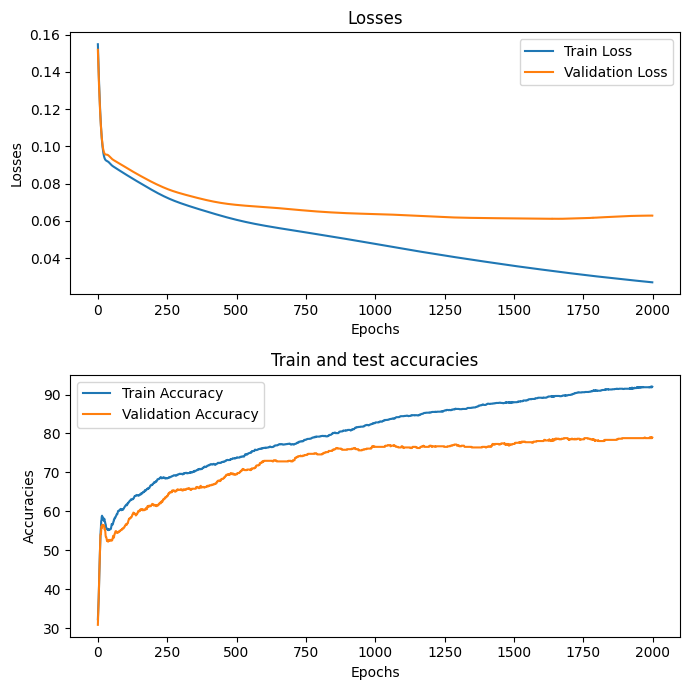

In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
act_funct = nn.Tanh()

# stack = nn.Sequential(
#     nn.Linear(12, 32),
#     act_funct,
#     nn.Linear(32, 32),
#     act_funct,
#     # nn.Linear(34, 34),
#     # act_funct,
#     # nn.Linear(32, 64),
#     # act_funct,
#     nn.Linear(32, 3),
# )

# model = NeuralNetwork(nn.CrossEntropyLoss(), 1000, stack, 0.0009, df)

stack = nn.Sequential(
    nn.Linear(12, 32),
    act_funct,
    nn.Linear(32, 32),
    act_funct,
    # nn.Linear(32, 32),
    # act_funct,
    # nn.Linear(32, 64),
    # act_funct,
    nn.Linear(32, 3),
)

model = NeuralNetwork(nn.SmoothL1Loss(), 2000, stack, 0.001, df)
# test_accuracy, test_loss = model.run_batch(300, True)
test_accuracy, test_loss = model.run_full(True)
# test_accuracy, test_loss = model.run_kfold(True, 5)
print(test_loss)


In [ ]:
import torch.multiprocessing as mp
from itertools import product
import time

# Implement grid search fro Learning rate and Activation function
epochs = []
learning_rates = [0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.Tanh, nn.Sigmoid, nn.Softplus]

# Initialize the stack
# loss_fn = nn.BCELoss()  # binary cross entropy
# loss_fn = nn.MSELoss()
# loss_fn = nn.CrossEntropyLoss()

# Do a grid search for activation function and learning rate and plot the resulst using a heatmap
# results = np.zeros((len(activation_functions), len(learning_rates)))
param1 = []
param2 = []
accuracy = []
loss = []

for i, act in enumerate(activation_functions):
    print("Activation Function: ", act)
    for j, lr in enumerate(learning_rates):
        stack = nn.Sequential(
            nn.Linear(12, 32),
            act_funct,
            nn.Linear(32, 32),
            act_funct,
            nn.Linear(32, 3),
        #     nn.Linear(12, 64),
        #     act(),
        #     nn.Linear(64, 64),
        #     act(),
        #     nn.Linear(64, 64),
        #     act(),
        #     nn.Linear(64, 3),
        )
        test_accuracy_arr = []
        for _ in range (3):
            model = NeuralNetwork(nn.CrossEntropyLoss(), 100, stack, lr, df)
            test_accuracy, test_loss, = model.run_batch(50, True)

            param1.append(act.__name__)
            param2.append(lr)
            accuracy.append(test_accuracy)
            loss.append(test_loss)
            # test_accuracy_arr.append(test_accuracy)
            del model


data = {
    'Activation Function': param1,
    'Learning Rate': param2,
    'Accuracy': accuracy,
    'Loss': loss
}

results = pd.DataFrame(data)

# sns.heatmap(results, annot=True, yticklabels=activation_functions, xticklabels=learning_rates, cmap='coolwarm')
# model = NeuralNetwork(nn.Tanh(), nn.MSELoss(), 1000, stack)
# model.run()

In [501]:
# pivot_table = results.pivot_table('Activation Function', 'Learning Rate', 'Accuracy')
pivot_table = pd.pivot_table(results, values='Accuracy', index='Activation Function', columns='Learning Rate')

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Accuracy for Hyperparameter Combinations')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

pivot_table = pd.pivot_table(results, values='Loss', index='Activation Function', columns='Learning Rate')

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Accuracy for Hyperparameter Combinations')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

performance_stats = results.groupby(['Activation Function', 'Learning Rate']).agg(
    mean_accuracy=('Accuracy', 'mean'),
    std_accuracy=('Accuracy', 'std')
).reset_index()

print(performance_stats)

accuracy_param1 = results[results['Activation Function'] == 'ReLU']['Accuracy']
accuracy_param2 = results[results['Activation Function'] == 'LeakyReLU']['Accuracy']

# Perform an independent t-test between the two sets of accuracies
t_stat, p_value = ttest_ind(accuracy_param1, accuracy_param2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

NameError: name 'results' is not defined